This example is inspired by the following script:
https://github.com/scikit-tda/kepler-mapper/blob/master/examples/digits/digits.ipynb
There are hovewer substantial changes to it that simplify the visualization. 

This is an interesting example of use of Mapper, as the domain of the lense is $$R^2$$ instead of $$R$$. The lense will be constructed using UMAP library, that project the hand written digits from their ambient space to $$R^2$$.

In [4]:
!pip install igraph
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 6.2 MB/s eta 0:00:00m eta 0:00:010:01:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [6]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 976.2 kB/s eta 0:00:001m697.9 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 2.6 MB/s eta 0:00:00 MB/s eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 3.6 MB/s eta 0:00:00m eta 0:00:010:01:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [7]:
import kmapper as km
from kmapper import jupyter 
import numpy as np
import sklearn
from sklearn import datasets
try:
    import umap
except ImportError:
    print("This example requires the UMAP library. You can install it with the command `!pip install umap-learn`")
import warnings
warnings.filterwarnings("ignore")
from kmapper.plotlyviz import plotlyviz
from kmapper.plotlyviz import *
import plotly.graph_objs as go
import ipywidgets as ipw
import matplotlib.pyplot as plt
%matplotlib inline

This example requires the UMAP library. You can install it with the command `!pip install umap-learn`


In [8]:
data, labels = datasets.load_digits().data, datasets.load_digits().target

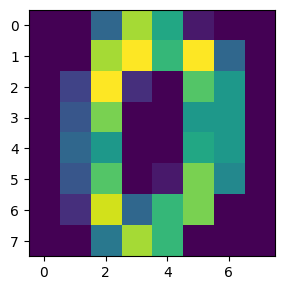

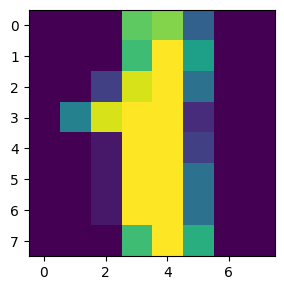

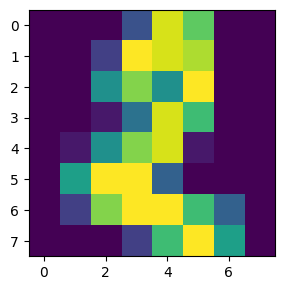

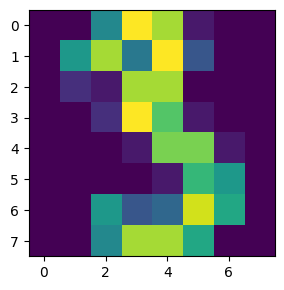

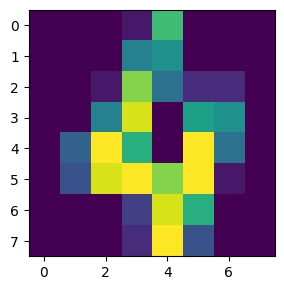

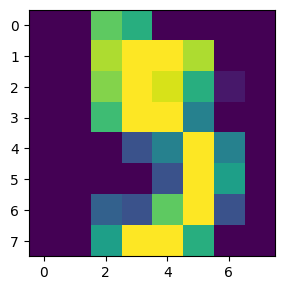

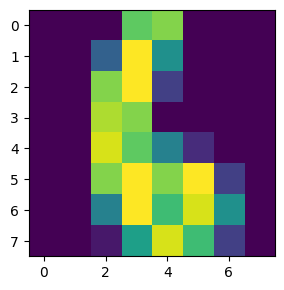

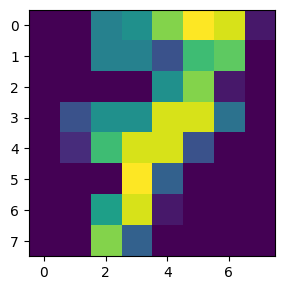

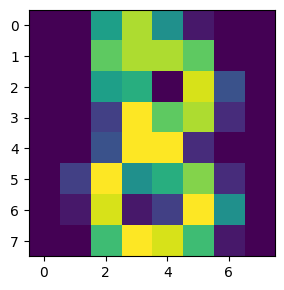

In [9]:
#Let us take a look at the data - they are low resolution hand written figures:

for i in range(0,9):
    digit = np.resize(data[i],(8,8))
    fig = plt.figure(figsize=(6, 3.2))
    plt.imshow(digit)

In [11]:
!pip install umap-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 664.3 kB/s eta 0:00:00 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 3.6 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [12]:
import umap.umap_ as umap

In [13]:
#Let us now construst the mapper
mapper = km.KeplerMapper(verbose=1)

#Our lense function will be baser on 2-dimensional UMAP projection of the digits that we are going to construct right here:
projected_data_ = mapper.fit_transform(data, projection=umap.UMAP(n_neighbors=8,
                                                                 min_dist=0.65,
                                                                 n_components=2,
                                                                 metric='euclidean',
                                                                 random_state=3571))

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: UMAP(min_dist=0.65, n_neighbors=8, random_state=3571)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (1797, 64)

..Projecting data using: 
	UMAP(min_dist=0.65, n_neighbors=8, random_state=3571, verbose=1)

UMAP(min_dist=0.65, n_jobs=1, n_neighbors=8, random_state=3571, verbose=1)
Fri May  3 20:11:28 2024 Construct fuzzy simplicial set
Fri May  3 20:11:30 2024 Finding Nearest Neighbors
Fri May  3 20:11:34 2024 Finished Nearest Neighbor Search
Fri May  3 20:11:36 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri May  3 20:11:40 2024 Finished embedding

..Scaling with: MinMaxScaler()



In [18]:
graph = mapper.map(projected_data_,data,
                      #clusterer=sklearn.cluster.DBSCAN(eps=20, min_samples=10),#Note that this gives separation of all the digits
                      clusterer=sklearn.cluster.DBSCAN(eps=20, min_samples=3),
                      #clusterer=sklearn.cluster.KMeans(init="k-means++", n_clusters=10),
                      #clusterer=sklearn.cluster.MeanShift(min_bin_freq=1, cluster_all=True, max_iter=300),
                      #clusterer=sklearn.cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', compute_full_tree='auto', linkage='ward'),
                      #clusterer=sklearn.cluster.SpectralClustering(n_clusters=8,n_init=10,n_neighbors=10),                
                      #cover=km.Cover(20, 0.8))
                      cover=km.Cover(5, 0.5))
html = mapper.visualize(graph,color_function=labels, color_function_name="red",path_html="projection_of_digits.html")

jupyter.display(path_html="projection_of_digits.html")

Mapping on data shaped (1797, 64) using lens shaped (1797, 2)

Creating 25 hypercubes.

Created 264 edges and 144 nodes in 0:00:00.406753.
Wrote visualization to: projection_of_digits.html


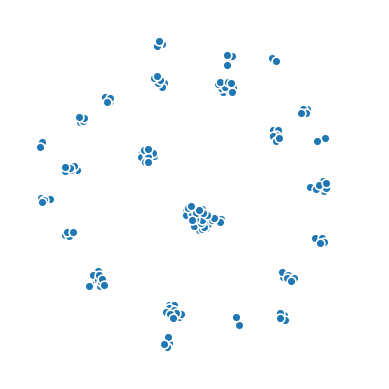

In [19]:
plot = km.draw_matplotlib(graph, layout="spring")